In [1]:
#https://www.youtube.com/watch?v=zmlulaxatRs
using Pkg
using Flux
using Flux: crossentropy, onecold, onehotbatch, train!, params
using Images
using MLDatasets
using Plots
using LinearAlgebra
using Random
using Statistics

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
x_train_raw, y_train_raw = MLDatasets.MNIST.traindata(Float32)
x_test_raw, y_test_raw = MLDatasets.MNIST.testdata(Float32)

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\cormy\.julia\packages\MLDatasets\EXhDV\src\datasets\vision\mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\cormy\.julia\packages\MLDatasets\EXhDV\src\datasets\vision\mnist.jl:195


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

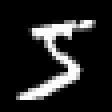

In [4]:
index = 1
img = x_train_raw[:,:,index]
colorview(Gray,img') #notice the image has been transosed

In [5]:
y_train_raw[index]

5

In [6]:
#data pre-processing
x_train = Flux.flatten(x_train_raw) #convert tensor to a matrix
x_test = Flux.flatten(x_test_raw)

784×10000 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [7]:
y_train = onehotbatch(y_train_raw, 0:9) #create a matrix where column is the index and theres a 1 at the correct row
y_test = onehotbatch(y_test_raw, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [8]:
#Define model architecture
model = Chain(
    Dense(28*28,32,relu), #Take 28*28 inputs (pixel data) and convert to 32 outputs (hidden layer)
    Dense(32,10), #Take 32 inputs and convert to 10 outputs (1-9)
    softmax
)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [22]:
#Define loss function
loss(model,x,y) = crossentropy(model(x),y) #https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

loss (generic function with 3 methods)

In [1]:
#Initialize random parameters then optimize
ps = params(model)
opt = Flux.setup(Adam(), model) #https://optimization.cbe.cornell.edu/index.php?title=Adam

LoadError: UndefVarError: `params` not defined

In [25]:
#Train
loss_history = []
epochs = 500
for epoch in 1:epochs
    train!(loss,model,[(x_train,y_train)],opt)
    train_loss = loss(model,x_train,y_train)
    push!(loss_history, train_loss)
    println("Epoch = $epoch : Training Loss = $train_loss")
end

Epoch = 1 : Training Loss = 2.1501648
Epoch = 2 : Training Loss = 2.0812385
Epoch = 3 : Training Loss = 2.0137823
Epoch = 4 : Training Loss = 1.947722
Epoch = 5 : Training Loss = 1.8829591
Epoch = 6 : Training Loss = 1.8194561
Epoch = 7 : Training Loss = 1.7573949
Epoch = 8 : Training Loss = 1.6969022
Epoch = 9 : Training Loss = 1.6381135
Epoch = 10 : Training Loss = 1.581132
Epoch = 11 : Training Loss = 1.5259081
Epoch = 12 : Training Loss = 1.4724023
Epoch = 13 : Training Loss = 1.4206012
Epoch = 14 : Training Loss = 1.3705922
Epoch = 15 : Training Loss = 1.3224312
Epoch = 16 : Training Loss = 1.2762625
Epoch = 17 : Training Loss = 1.2322655
Epoch = 18 : Training Loss = 1.1905284
Epoch = 19 : Training Loss = 1.1509624
Epoch = 20 : Training Loss = 1.1134573
Epoch = 21 : Training Loss = 1.0778315
Epoch = 22 : Training Loss = 1.0439432
Epoch = 23 : Training Loss = 1.0117408
Epoch = 24 : Training Loss = 0.9811663
Epoch = 25 : Training Loss = 0.952186
Epoch = 26 : Training Loss = 0.924753

Epoch = 207 : Training Loss = 0.26581365
Epoch = 208 : Training Loss = 0.26522437
Epoch = 209 : Training Loss = 0.26463848
Epoch = 210 : Training Loss = 0.26405615
Epoch = 211 : Training Loss = 0.2634777
Epoch = 212 : Training Loss = 0.26290217
Epoch = 213 : Training Loss = 0.26232934
Epoch = 214 : Training Loss = 0.26175922
Epoch = 215 : Training Loss = 0.26119235
Epoch = 216 : Training Loss = 0.26062843
Epoch = 217 : Training Loss = 0.26006737
Epoch = 218 : Training Loss = 0.25950918
Epoch = 219 : Training Loss = 0.25895408
Epoch = 220 : Training Loss = 0.25840232
Epoch = 221 : Training Loss = 0.25785407
Epoch = 222 : Training Loss = 0.25730896
Epoch = 223 : Training Loss = 0.25676674
Epoch = 224 : Training Loss = 0.25622737
Epoch = 225 : Training Loss = 0.25569132
Epoch = 226 : Training Loss = 0.25515777
Epoch = 227 : Training Loss = 0.25462714
Epoch = 228 : Training Loss = 0.25409886
Epoch = 229 : Training Loss = 0.25357294
Epoch = 230 : Training Loss = 0.25304952
Epoch = 231 : Tra

Epoch = 408 : Training Loss = 0.18703495
Epoch = 409 : Training Loss = 0.18677099
Epoch = 410 : Training Loss = 0.18650791
Epoch = 411 : Training Loss = 0.18624574
Epoch = 412 : Training Loss = 0.18598433
Epoch = 413 : Training Loss = 0.1857238
Epoch = 414 : Training Loss = 0.18546392
Epoch = 415 : Training Loss = 0.18520467
Epoch = 416 : Training Loss = 0.18494625
Epoch = 417 : Training Loss = 0.1846888
Epoch = 418 : Training Loss = 0.18443225
Epoch = 419 : Training Loss = 0.18417662
Epoch = 420 : Training Loss = 0.18392198
Epoch = 421 : Training Loss = 0.18366832
Epoch = 422 : Training Loss = 0.18341526
Epoch = 423 : Training Loss = 0.1831631
Epoch = 424 : Training Loss = 0.18291181
Epoch = 425 : Training Loss = 0.18266119
Epoch = 426 : Training Loss = 0.18241115
Epoch = 427 : Training Loss = 0.18216169
Epoch = 428 : Training Loss = 0.18191303
Epoch = 429 : Training Loss = 0.18166497
Epoch = 430 : Training Loss = 0.18141775
Epoch = 431 : Training Loss = 0.18117145
Epoch = 432 : Train

In [41]:
y_hat_raw = model(x_test)
y_hat = onecold(y_hat_raw) .- 1
y = y_test_raw
score = mean(y_hat .== y)
println("score = $score")

score = 0.9501


In [47]:
check = [y_hat[i] == y[i] for i in 1:length(y)] #1 for success, 0 for fail
index = collect(1:length(y))
check_display = [index y_hat y check]

10000×4 Matrix{Int64}:
     1  7  7  1
     2  2  2  1
     3  1  1  1
     4  0  0  1
     5  4  4  1
     6  1  1  1
     7  4  4  1
     8  9  9  1
     9  6  5  0
    10  9  9  1
    11  0  0  1
    12  6  6  1
    13  9  9  1
     ⋮        
  9989  5  5  1
  9990  6  6  1
  9991  7  7  1
  9992  8  8  1
  9993  9  9  1
  9994  0  0  1
  9995  1  1  1
  9996  2  2  1
  9997  3  3  1
  9998  4  4  1
  9999  5  5  1
 10000  6  6  1

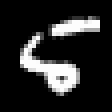

In [55]:
fail_index = 9
img = x_test_raw[:,:,fail_index]
colorview(Gray,img') #nah man that aint a number

In [56]:
y_test_raw[fail_index]

5

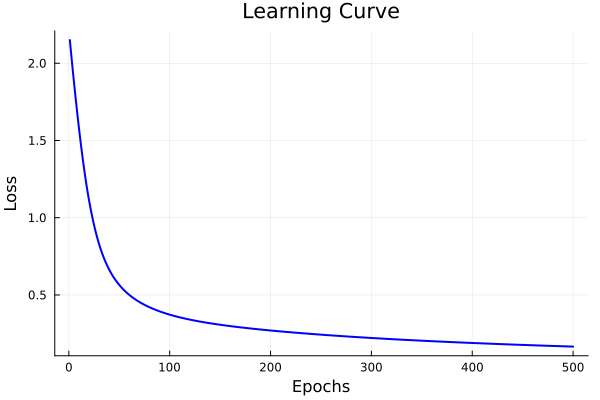

In [57]:
learn_curve = plot(1:epochs, loss_history, xlabel="Epochs",ylabel="Loss",title="Learning Curve", legend=false,color=:blue,linewidth=2)

In [58]:
savefig(learn_curve,"learning_curve.png")

"C:\\Users\\cormy\\Desktop\\Nerd shit\\MNIST\\learning_curve.png"

In [59]:
plot(model)

LoadError: Cannot convert Chain{Tuple{Dense{typeof(relu), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, typeof(softmax)}} to series data for plotting